In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

# import yaml

## Manipulate Data from SEADE

In [231]:
var = pd.read_csv('../data/variaveis_selected.csv')
mask = (var['tipo']=='agro') | (var['variavel'].str.contains('Série interrompida'))
var  = var[np.logical_not(mask)]

geocode_seade = pd.read_csv('../../brasil_geodata/dados/seade_codigo_ibge.csv')


In [232]:
def split_data(df):
    df['ano'] = df['ano'].str.replace("'","").str.replace("{","").str.replace("}","").apply(lambda x: x.split(":"))    
    df['valor']  = df['ano'].apply(lambda x: x[1])
    df['ano']  = df['ano'].apply(lambda x: x[0])
    df['valor'] = df['valor'].str.replace('.','').str.replace(',','.')
    
    return(df)

In [233]:
df = pd.read_csv('../data/dados_consolidados.csv')
mask = df['variavel']!='missing'
df = df[mask]

ddf = split_data(df)
dd = ddf.sort_values(by=['codigo_localidade','periodo','nome_localidade_pai','year'], ascending=False).drop_duplicates(['localidade','variavel'],keep='first').sort_values(by='variavel')

dh = ddf.sort_values(by=['codigo_localidade','periodo','nome_localidade_pai','year'], ascending=False).sort_values(by=['variavel','ano'])

In [234]:
dd = dd.merge(var,on='variavel', how='inner')

dd['codigo_localidade'] = dd['codigo_localidade'].astype(int) 
dd = dd.sort_values(by=['variavel','codigo_localidade'])

cols = ['codigo_localidade','nome_localidade_pai','codigo_variavel','loc','year']
dd = dd.drop(cols,1)


mask = (dd['porctal']==1)
dd = dd[mask]

dd = dd.merge(geocode_seade,on='localidade', how='left')

## Educacao
 - [QEdu](https://www.qedu.org.br/) 
 - [Dados Abertos da Educação de SP](https://dados.educacao.sp.gov.br/search/type/dataset)
 - [INEP - Microdados](http://portal.inep.gov.br/microdados#)
 - [IDEB](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)
 - [Censo Escolar - BI](https://inepdata.inep.gov.br/analytics/saw.dll?Portal&PortalPath=%2Fshared%2FEduca%C3%A7%C3%A3o%20B%C3%A1sica%20-%20Acesso%20Externo%2FArquivos%2FCenso%2FConsolidado%2FInforma%C3%A7%C3%B5es%20Consolidadas%2FFun%C3%A7%C3%B5es%20Docentes%2FPanorama%20deFun%C3%A7%C3%B5es%20Docentes%20na%20Educa%C3%A7%C3%A3o%20B%C3%A1sica)



In [236]:
def plot_bars(df, var, xx='localidade', yy='valor'):
    
    mask = (df['variavel']==var) & (df['valor']!=' ') 
    # mask = (dd['portal']==1)
    df = df[mask]
    df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
    
    df = df.sort_values(by='valor')


    sp_color = '#0D485A'
    vale_color  = '#FA7609'
    
    
    df['color'] = np.where(df['localidade']=='Total do Estado de São Paulo', sp_color,vale_color)
    
    trace = go.Bar(
                    y=df[xx],
                    x=df[yy],
                    marker_color=df['color'],
                    orientation='h'
            )
    
    data = [trace]
    
    fig = go.Figure(data)
    

    ano = max(df['ano'])
    fig.update_layout({'template': 'plotly_white', 
                       'title': f'{var} - {ano}'})
    
    return fig.update_layout(hovermode = 'y', height=1200), df

In [237]:
mask = dd['localidade']=='Taubaté'
dd[mask]

,localidade,variavel,unidade,periodo,ano,valor,tipo,portal,geocodigo
33,Taubaté,Concluintes do Ensino Fundamental,Não possui unidade,2001-2005/2007-2013,2013,4261,educacao,1.0,3554102.0
74,Taubaté,Concluintes do Ensino Médio,Não possui unidade,2001-2005/2007-2013,2013,3018,educacao,1.0,3554102.0
115,Taubaté,Matrículas na Creche,Não possui unidade,2000-2019,2019,6925,educacao,1.0,3554102.0
156,Taubaté,Matrículas na Educação Infantil,Não possui unidade,2000-2019,2019,15374,educacao,1.0,3554102.0
197,Taubaté,Matrículas na Pré-escola,Não possui unidade,1980/1985/1988-2019,2019,8449,educacao,1.0,3554102.0
238,Taubaté,Matrículas no Ensino Fundamental,Não possui unidade,1980/1985/1988-2019,2019,38687,educacao,1.0,3554102.0
279,Taubaté,Matrículas no Ensino Médio,Não possui unidade,1980/1985/1988-2019,2019,11144,educacao,1.0,3554102.0
320,Taubaté,Meta do Índice de Desenvolvimento da Educação Básica (IDEB) - Ensino Fundamental - Anos Finais -...,Não possui unidade,2007/2009/2011/2013/2015/2017/2019/2021,2019,5.0,educacao,1.0,3554102.0
360,Taubaté,Meta do Índice de Desenvolvimento da Educação Básica (IDEB) - Ensino Fundamental - Anos Finais -...,Não possui unidade,2007/2009/2011/2013/2015/2017/2019/2021,2019,6.1,educacao,1.0,3554102.0
399,Taubaté,Meta do Índice de Desenvolvimento da Educação Básica (IDEB) - Ensino Fundamental - Anos Finais -...,Não possui unidade,2007/2009/2011/2013/2015/2017/2019/2021,2019,5.3,educacao,1.0,3554102.0


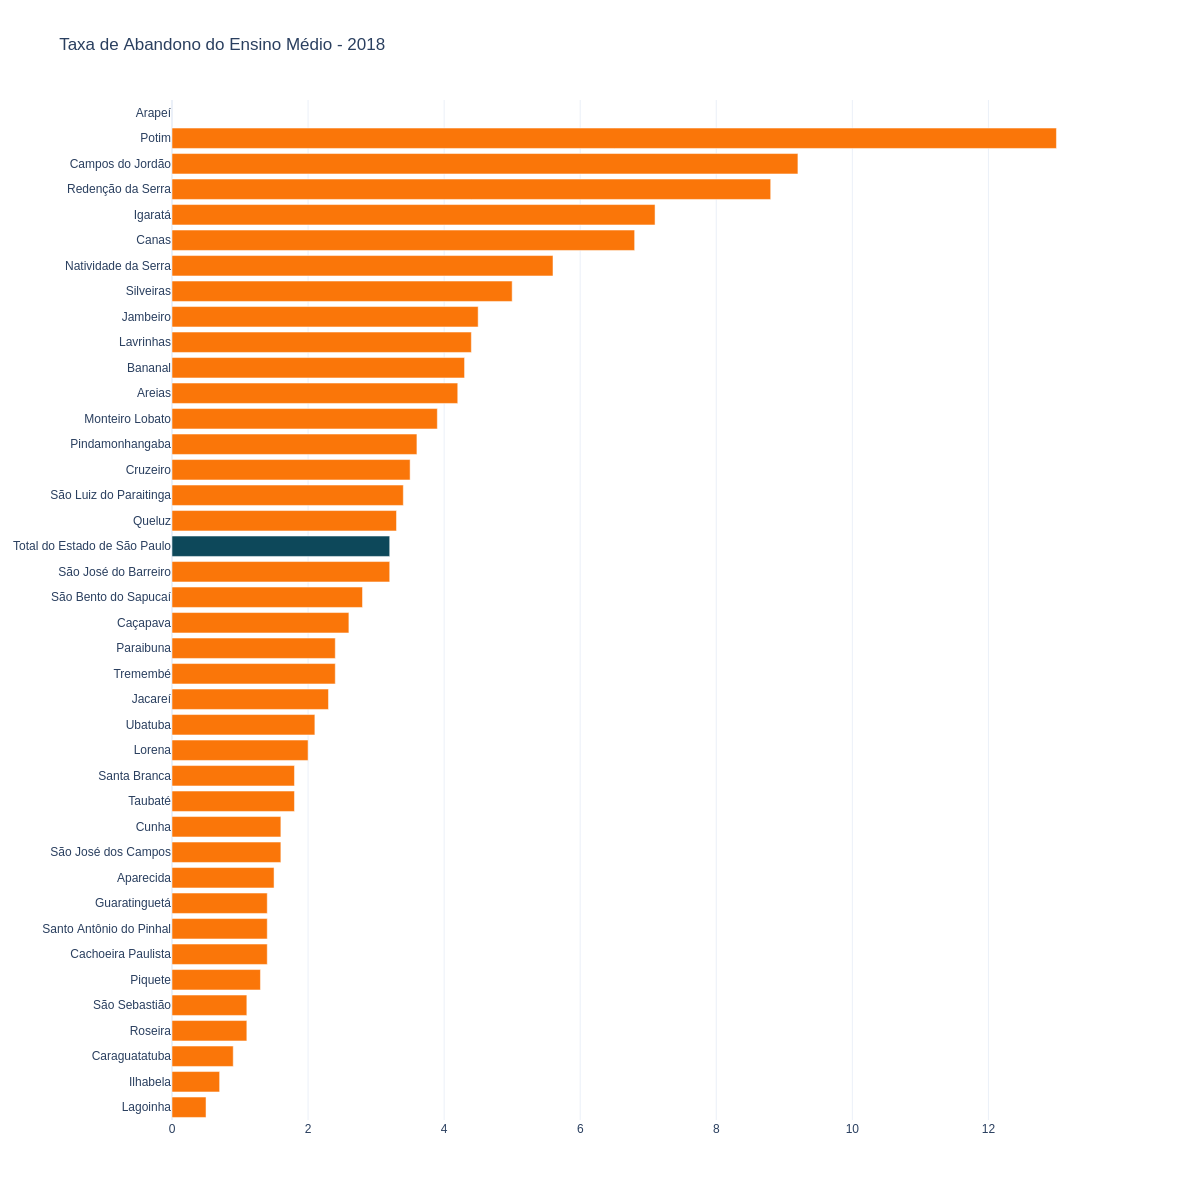

In [238]:
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# var = 'Índice de Desenvolvimento da Educação do Estado de São Paulo (Idesp) - Ensino Médio'
var = 'Taxa de Abandono do Ensino Médio'
fig, da = plot_bars(dd,var)
fig

In [253]:
import geopandas as gpd
import matplotlib.pyplot as plt

sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
sp = sp[['geocodigo','geometry']]

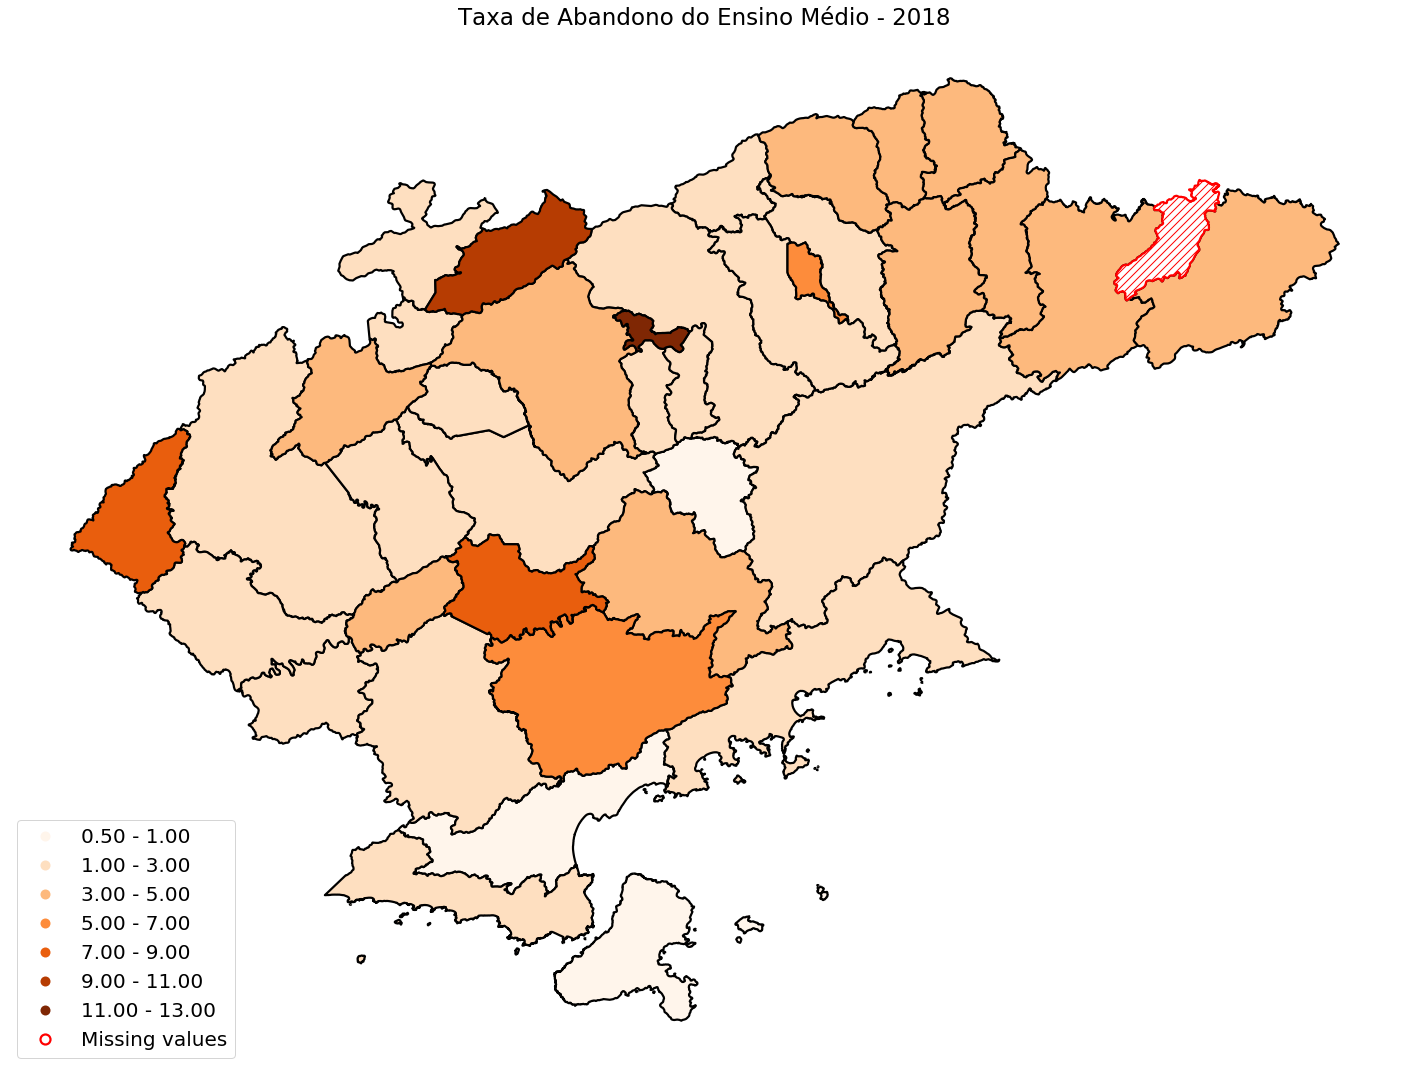

In [291]:
var = 'Taxa de Abandono do Ensino Médio'
fig = plot_map(dd,var)



In [289]:
def plot_map(df, var, xx='localidade', yy='valor'):
    
    mask = (df['variavel']==var) & (df['valor']!=' ') 
    # mask = (dd['portal']==1)
    df = df[mask]
    df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
    
    da = df.sort_values(by='valor')
    
    
    da = da.merge(sp, on='geocodigo', how='left')
    da = da[da['geocodigo'].notnull()]
    da = gpd.GeoDataFrame(da)

    ano = max(da['ano'])
    
    #Plot Map
    fig = plt.figure(figsize=(25,25))
    ax  = fig.add_subplot(1,1,1)
    ax.set_title(f'{var} - {ano}', fontsize=23)


    missings={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }

    da.plot(column='valor',ax=ax, legend=True,cmap='Oranges', edgecolor = "black",linewidth=2.2,\
            scheme='user_defined', classification_kwds={'bins':[1, 3, 5,7,9,11]},\
            missing_kwds=missings, legend_kwds={'loc': 'lower left'})
    # df_plot.plot(column=var ,ax=ax, legend=True,cmap='Oranges', edgecolor = "#807158",scheme='quantiles',k=100, missing_kwds=missings
    # df_plot.plot(column=var ,ax=ax, legend=True,cmap='Oranges',missing_kwds=missings, edgecolor = "#807158",scheme='user_defined',classification_kwds={'bins':scale} )

    # da.plot(column='valor' ,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff" ,missing_kwds=missings, scheme='quantiles',k=5)
    ax.axis('off')

    # for idx, row in df_test.iterrows():
    #     plt.annotate(s=row[var_dissolve] + "\n" + str('{:.1f}'.format(row[var])), xy=row['coords'],fontsize=18,
    #                  horizontalalignment='center', color='#360102')


    plt.rc('legend',fontsize=20)


    return fig

In [292]:


from lightning import Lightning

from numpy import random, zeros




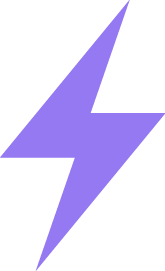

Problem connecting to server at http://public.lightning-viz.org
status code: 404


ValueError: Could not access server

In [293]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [294]:
from lightning import Lightning

lgn = Lightning(host="http://my-lightning-instance.herokuapp.com")

lgn.create_session()
lgn.create_session("provide an optional session name")

Lightning initialized
Problem connecting to server at http://my-lightning-instance.herokuapp.com
status code: 404


ValueError: Could not access server